![rmotr](https://user-images.githubusercontent.com/7065401/39119486-4718e386-46ec-11e8-9fc3-5250a49ef570.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/39123704-ea58fb38-46f8-11e8-883c-d01f27909c43.jpg"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Project assignment: Marketing Analysis

Your homework for today is to clean, normalize and analyze a dataset gathered from shopping mall customers in the San Francisco Bay area. It's a survey done in 1987, so you might expect many data-entry related errors.

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

### Hands on! 

The dataset is contained in `data/marketing.csv` along with a file that describes the fields (`data/marketing-description.txt`).

What inconsistencies can you find? What are the fields with more issues? How can you transform the data to be expressed in a better way? What variables are related and at what extent?

All these are the questions that you should be asking and answering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(rc={'figure.figsize': (18, 6)})

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">1.</span>
            Load the dataset `data/marketing.csv` as a Pandas dataframe on a variable called `df`.
        </td>
    </tr>
</table>

We don't want you to get stuck with this step. Reading and parsing CSV's with incorrect structure, encoding or separators can be tedious. Only for this step, the solution is provided. Your job is to keep completing the cells that are empty and have the `Your code goes here` comment.

In [3]:
df = pd.read_csv('data/marketing.csv', sep=';')

In [4]:
df.head()

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,AnualIncome
1,2,1,5.0,4,5,5,3,3,0,Own,1,7,?,76004
2,Male,1,5.0,5,5,5,3,5,2,Own,1,7,1,76004
3,2,1,3.0,5,1,5,2,3,1,Rent,3,7,1,34000
4,2,5,1.0,2,6,5,1,4,2,Live with Parents/Family,1,7,1,9136
5,2,5,1.0,2,6,3,1,4,2,Live with Parents/Family,1,7,1,9136


In [5]:
df.tail()

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,AnualIncome
8989,2,5,1.0,1,2,5,1,3,2,Live with Parents/Family,1,7,1,9136
8990,Male,5,2.0,4,1,5,1,4,0,Live with Parents/Family,1,7,1,11703
8991,2,5,1.0,2,1,5,1,3,2,Live with Parents/Family,1,7,1,9136
8992,Male,1,6.0,4,3,5,2,3,1,Rent,3,7,1,21672
8993,Male,5,3.0,4,1,5,1,1,0,Rent,3,5,1,32171


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">2.</span>
            Check if there is any null value on the dataframe.
        </td>
    </tr>
</table>

> ⚠️ <i>Sometimes null values are represented by special characters, check <b>unique values</b> to find them.</i>

In [6]:
# actual nan vaules
df.isnull().sum()

Sex                  3
MaritalStatus        2
Age                  2
Education            1
Occupation          12
YearsInSf            0
DualIncome           0
HouseholdMembers     4
Under18              0
HouseholdStatus      3
TypeOfHome           0
EthnicClass          4
Language             1
AnualIncome          6
dtype: int64

In [7]:
# checking for unique values.
['Column {}: unique values  {}'.format(c, df[c].unique()) for c in df.columns]

["Column Sex: unique values  ['2' 'Male' '8' nan '9']",
 "Column MaritalStatus: unique values  ['1' '5' '3' '2' '4' '?' nan]",
 'Column Age: unique values  [ 5.  3.  1.  6.  2.  7.  4. nan]',
 "Column Education: unique values  ['4' '5' '2' '3' '6' nan '1' '?']",
 "Column Occupation: unique values  ['5' '1' '6' '8' '9' '3' '2' '?' nan '4' '7']",
 "Column YearsInSf: unique values  ['5' '3' '4' '2' '1' '?']",
 'Column DualIncome: unique values  [3 2 1]',
 "Column HouseholdMembers: unique values  ['3' '5' '4' '2' '1' nan '6' '?' '7' '8' '9']",
 'Column Under18: unique values  [0 2 1 3 4 5 6 8 7 9]',
 "Column HouseholdStatus: unique values  ['Own' 'Rent' 'Live with Parents/Family' nan '?' 'Rental'\n 'Live with Parents' 'Live with Family' 'Live with Fam']",
 "Column TypeOfHome: unique values  ['1' '3' '5' '2' '4' '?']",
 "Column EthnicClass: unique values  ['7' '5' '2' '3' '8' '4' '1' '?' '6' nan]",
 "Column Language: unique values  ['?' '1' '2' '3' nan]",
 "Column AnualIncome: unique values

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">3.</span>
            Remove the rows that contain invalid values.
        </td>
    </tr>
</table>

In [8]:
df_0 = df.copy()

In [9]:
# change ? to nan, then drop nan rows
df = df.replace({'?': np.nan})
df = df.dropna() #default drop axis=0, row that have nan values
['Column {}: unique values  {}'.format(c, df[c].unique()) for c in df.columns]

["Column Sex: unique values  ['Male' '2' '8' '9']",
 "Column MaritalStatus: unique values  ['1' '5' '3' '2' '4']",
 'Column Age: unique values  [5. 3. 1. 6. 2. 7. 4.]',
 "Column Education: unique values  ['5' '2' '4' '3' '6' '1']",
 "Column Occupation: unique values  ['5' '1' '6' '8' '9' '3' '2' '4' '7']",
 "Column YearsInSf: unique values  ['5' '3' '4' '2' '1']",
 'Column DualIncome: unique values  [3 2 1]',
 "Column HouseholdMembers: unique values  ['5' '3' '4' '2' '1' '6' '7' '9' '8']",
 'Column Under18: unique values  [2 1 0 3 4 5 6 8 7 9]',
 "Column HouseholdStatus: unique values  ['Own' 'Rent' 'Live with Parents/Family' 'Rental' 'Live with Parents'\n 'Live with Family' 'Live with Fam']",
 "Column TypeOfHome: unique values  ['1' '3' '5' '2' '4']",
 "Column EthnicClass: unique values  ['7' '5' '2' '3' '4' '8' '1' '6']",
 "Column Language: unique values  ['1' '3' '2']",
 "Column AnualIncome: unique values  ['76004' '34000' '9136' '66994' '32171' '11703' '21672' '46894' '27591'\n '19

In [10]:
df_1 = df.copy()

In [11]:
# Change words into number values.
df = df.replace({
    # changing Sex info
    'Male': 1, # sex, male is 1
    # changing HouseholdStatus DO LATER
    'Own': 1,
    'Rent': 2,
    'Live with Parents/Family': 3,
    'Rental': 2,
    'Live with Parents': 3,
    'Live with Family': np.nan, # this ambiguous, could be parents, or grandparents, or childern, not counting
    'Live with Fam': np.nan, # ambiguous
})
df = df.dropna()

# Invalid numbers
mask_sex = (df.Sex != '8') & (df.Sex != '9') # 1 & 2 are valid, but no 1s, need to convert male to 1
df = df[mask_sex]
['Column {}: unique values  {}'.format(c, df[c].unique()) for c in df.columns]

["Column Sex: unique values  [1 '2']",
 "Column MaritalStatus: unique values  ['1' '5' '3' '2' '4']",
 'Column Age: unique values  [5. 3. 1. 6. 2. 7. 4.]',
 "Column Education: unique values  ['5' '2' '4' '3' '6' '1']",
 "Column Occupation: unique values  ['5' '1' '6' '8' '9' '3' '2' '4' '7']",
 "Column YearsInSf: unique values  ['5' '3' '4' '2' '1']",
 'Column DualIncome: unique values  [3 2 1]',
 "Column HouseholdMembers: unique values  ['5' '3' '4' '2' '1' '6' '7' '9' '8']",
 'Column Under18: unique values  [2 1 0 3 4 5 6 8 7 9]',
 'Column HouseholdStatus: unique values  [1. 2. 3.]',
 "Column TypeOfHome: unique values  ['1' '3' '5' '2' '4']",
 "Column EthnicClass: unique values  ['7' '5' '2' '3' '4' '8' '1' '6']",
 "Column Language: unique values  ['1' '3' '2']",
 "Column AnualIncome: unique values  ['76004' '34000' '9136' '66994' '32171' '11703' '21672' '46894' '27591'\n '19997' '253600' '7' '7540' '91000000000036' '5740' '460' '2460' '9460'\n '150500' '75500']"]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6838 entries, 2 to 8993
Data columns (total 14 columns):
Sex                 6838 non-null object
MaritalStatus       6838 non-null object
Age                 6838 non-null float64
Education           6838 non-null object
Occupation          6838 non-null object
YearsInSf           6838 non-null object
DualIncome          6838 non-null int64
HouseholdMembers    6838 non-null object
Under18             6838 non-null int64
HouseholdStatus     6838 non-null float64
TypeOfHome          6838 non-null object
EthnicClass         6838 non-null object
Language            6838 non-null object
AnualIncome         6838 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 801.3+ KB


In [13]:
# change floats to int
df.Age = df.Age.astype('int64')
df.HouseholdStatus = df.HouseholdStatus.astype('int64')
df.info()
['Column {}: unique values  {}'.format(c, df[c].unique()) for c in df.columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6838 entries, 2 to 8993
Data columns (total 14 columns):
Sex                 6838 non-null object
MaritalStatus       6838 non-null object
Age                 6838 non-null int64
Education           6838 non-null object
Occupation          6838 non-null object
YearsInSf           6838 non-null object
DualIncome          6838 non-null int64
HouseholdMembers    6838 non-null object
Under18             6838 non-null int64
HouseholdStatus     6838 non-null int64
TypeOfHome          6838 non-null object
EthnicClass         6838 non-null object
Language            6838 non-null object
AnualIncome         6838 non-null object
dtypes: int64(4), object(10)
memory usage: 801.3+ KB


["Column Sex: unique values  [1 '2']",
 "Column MaritalStatus: unique values  ['1' '5' '3' '2' '4']",
 'Column Age: unique values  [5 3 1 6 2 7 4]',
 "Column Education: unique values  ['5' '2' '4' '3' '6' '1']",
 "Column Occupation: unique values  ['5' '1' '6' '8' '9' '3' '2' '4' '7']",
 "Column YearsInSf: unique values  ['5' '3' '4' '2' '1']",
 'Column DualIncome: unique values  [3 2 1]',
 "Column HouseholdMembers: unique values  ['5' '3' '4' '2' '1' '6' '7' '9' '8']",
 'Column Under18: unique values  [2 1 0 3 4 5 6 8 7 9]',
 'Column HouseholdStatus: unique values  [1 2 3]',
 "Column TypeOfHome: unique values  ['1' '3' '5' '2' '4']",
 "Column EthnicClass: unique values  ['7' '5' '2' '3' '4' '8' '1' '6']",
 "Column Language: unique values  ['1' '3' '2']",
 "Column AnualIncome: unique values  ['76004' '34000' '9136' '66994' '32171' '11703' '21672' '46894' '27591'\n '19997' '253600' '7' '7540' '91000000000036' '5740' '460' '2460' '9460'\n '150500' '75500']"]

In [14]:
for column in df.columns:
    df[column] = df[column].apply(int)
['Column {}: unique values  {}'.format(c, df[c].unique()) for c in df.columns]

['Column Sex: unique values  [1 2]',
 'Column MaritalStatus: unique values  [1 5 3 2 4]',
 'Column Age: unique values  [5 3 1 6 2 7 4]',
 'Column Education: unique values  [5 2 4 3 6 1]',
 'Column Occupation: unique values  [5 1 6 8 9 3 2 4 7]',
 'Column YearsInSf: unique values  [5 3 4 2 1]',
 'Column DualIncome: unique values  [3 2 1]',
 'Column HouseholdMembers: unique values  [5 3 4 2 1 6 7 9 8]',
 'Column Under18: unique values  [2 1 0 3 4 5 6 8 7 9]',
 'Column HouseholdStatus: unique values  [1 2 3]',
 'Column TypeOfHome: unique values  [1 3 5 2 4]',
 'Column EthnicClass: unique values  [7 5 2 3 4 8 1 6]',
 'Column Language: unique values  [1 3 2]',
 'Column AnualIncome: unique values  [         76004          34000           9136          66994\n          32171          11703          21672          46894\n          27591          19997         253600              7\n           7540 91000000000036           5740            460\n           2460           9460         150500      

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">4.</span>
            Show <b>basic descriptive statistics</b> (mean, mix, max...) of the data.
        </td>
    </tr>
</table>

In [15]:
df.describe()

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,AnualIncome
count,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000,6.838000e+03
mean,1.554109,2.997221,3.409623,3.893682,3.639661,4.211612,1.550015,2.862679,0.688067,1.829190,1.821147,6.010968,1.116701,1.330802e+10
std,0.497100,1.813078,1.609430,1.243365,2.508553,1.217877,0.737669,1.531687,1.083041,0.742225,1.110289,1.739347,0.402725,1.100467e+12
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,7.000000e+00
25%,1.000000,1.000000,2.000000,3.000000,1.000000,4.000000,1.000000,2.000000,0.000000,1.000000,1.000000,5.000000,1.000000,1.170300e+04
50%,2.000000,3.000000,3.000000,4.000000,3.000000,5.000000,1.000000,3.000000,0.000000,2.000000,1.000000,7.000000,1.000000,3.217100e+04
75%,2.000000,5.000000,4.000000,5.000000,6.000000,5.000000,2.000000,4.000000,1.000000,2.000000,3.000000,7.000000,1.000000,6.699400e+04
max,2.000000,5.000000,7.000000,6.000000,9.000000,5.000000,3.000000,9.000000,9.000000,3.000000,5.000000,8.000000,3.000000,9.100000e+13


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">5.</span>
            Show a boxplot of `AnualIncome` variable.
        </td>
    </tr>
</table>

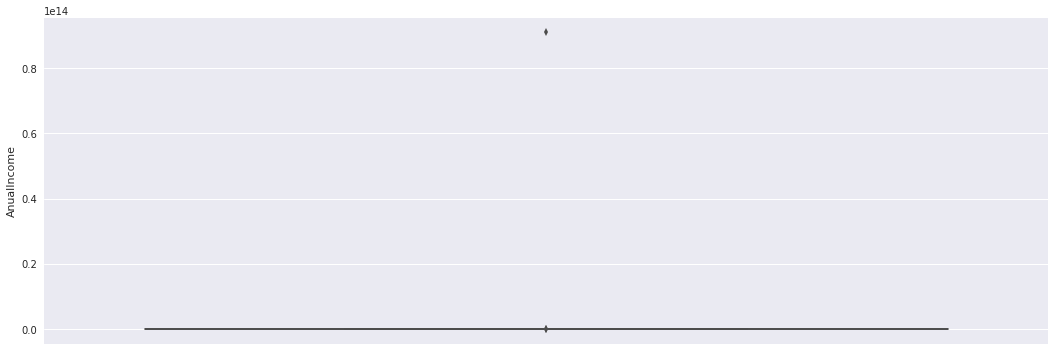

In [16]:
# since seabourn figure info was setup in input 2,
# going to use sns to make the plt
sns.boxplot(y='AnualIncome', data=df)
# sns.boxplot(data=df['AnualIncome'].to_frame())

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">6.</span>
            Identify outlier values on `AnualIncome` and remove them.
        </td>
    </tr>
</table>

In [17]:
df.AnualIncome.value_counts()

9136              1243
66994             1065
32171              843
46894              781
76004              736
21672              612
27591              523
11703              521
19997              503
253600               1
75500                1
34000                1
9460                 1
2460                 1
7540                 1
150500               1
5740                 1
7                    1
91000000000036       1
460                  1
Name: AnualIncome, dtype: int64

In [18]:
mask_anualincome = (df.AnualIncome != 34000) & (df.AnualIncome != 5740) & (df.AnualIncome != 91000000000036) & (df.AnualIncome != 150500) & (df.AnualIncome != 7540) & (df.AnualIncome != 2460) & (df.AnualIncome != 253600) & (df.AnualIncome != 9460) & (df.AnualIncome != 460) & (df.AnualIncome != 75500) & (df.AnualIncome != 7)
df.AnualIncome = df.AnualIncome[mask_anualincome]
df.AnualIncome.value_counts()

9136.0     1243
66994.0    1065
32171.0     843
46894.0     781
76004.0     736
21672.0     612
27591.0     523
11703.0     521
19997.0     503
Name: AnualIncome, dtype: int64

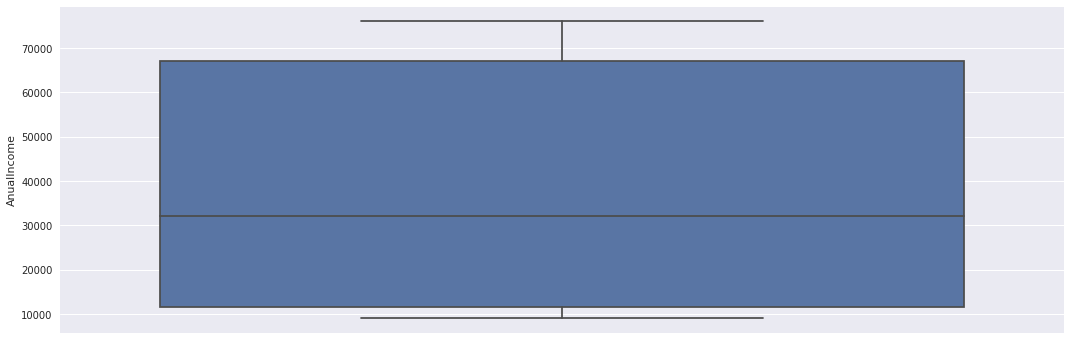

In [19]:
sns.boxplot(y='AnualIncome', data=df)

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">7.</span>
            Show two different `countplot` for `Sex` and `Education` variables.
        </td>
    </tr>
</table>

In [20]:
# sns.countplot(x=None, y=None, hue=None, 
# data=None, order=None, hue_order=None, orient=None, 
# color=None, palette=None, saturation=0.75, dodge=True, 
# ax=None, **kwargs)¶

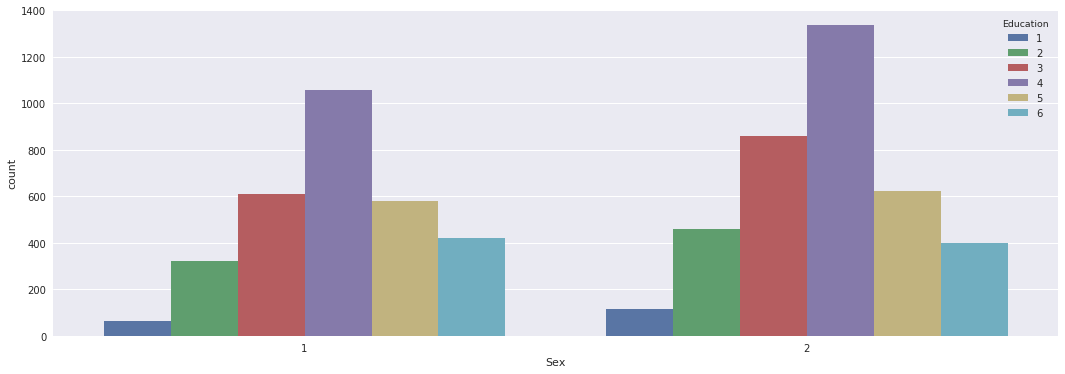

In [21]:
sns.countplot(x='Sex', hue='Education', data=df)

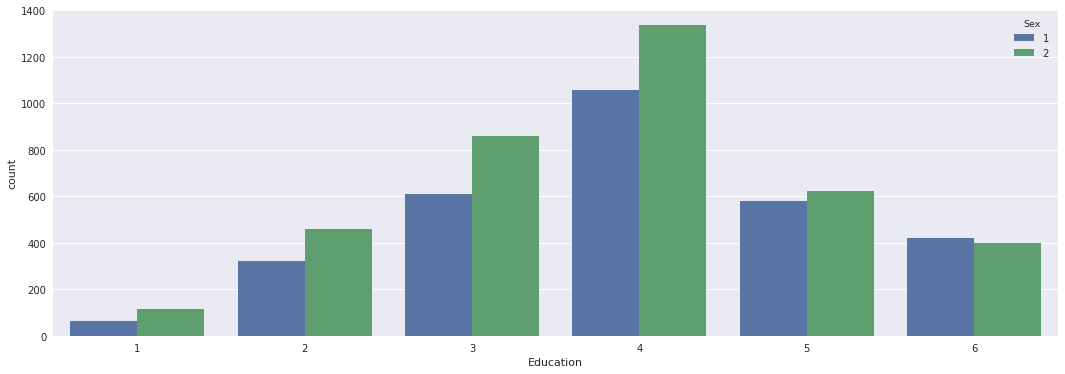

In [22]:
sns.countplot(x='Education', hue='Sex', data=df)

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">8.</span>
            Show only `Sex` and `HouseholdStatus` of the first 20 observations.
        </td>
    </tr>
</table>

In [24]:
# Sex is column 0, HouseholdStatus is column -5
df[['Sex', 'HouseholdStatus']].iloc[:20]

,Sex,HouseholdStatus
2,1,1
3,2,2
4,2,3
5,2,3
6,1,1
7,1,2
8,1,2
9,1,2
10,1,2
11,1,2


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">9.</span>
            Show only `MaritalStatus` of the observations in position 247.
        </td>
    </tr>
</table>

In [25]:
df.MaritalStatus.loc[247]

1

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">10.</span>
            How many males answered the survey?
        </td>
    </tr>
</table>

In [26]:
# male is sex == 1
(df.Sex == 1).sum()

3049

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">11.</span>
            How many people "Live with Parents/Family"?
        </td>
    </tr>
</table>

> ⚠️ <i>Remember "Live with Parents/Family" is on `HouseholdStatus` column.</i>

In [27]:
#need to use df_1 because I changed the data set already
(df_1.HouseholdStatus == "Live with Parents/Family").sum()

1396

---

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

### Optional exercises

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">12.</span>
            What is the most common `EthnicClass`?
        </td>
    </tr>
</table>

In [28]:
df.EthnicClass.value_counts()

7    4575
5     869
3     630
2     378
8     175
1     111
6      88
4      12
Name: EthnicClass, dtype: int64

In [29]:
# 7 == White

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">13.</span>
            Which occupation gets the highest anual income?
        </td>
    </tr>
</table>

In [30]:
# parse AnualIncome as int (already did that)
# df['AnualIncome'] = df['AnualIncome'].apply(int) 

df.groupby('Occupation')['AnualIncome'].sum().sort_values()

Occupation
7      4075155.0
9      5489970.0
3     17253575.0
8     17567999.0
2     20132917.0
5     20808172.0
6     22506709.0
4     26053193.0
1    112349390.0
Name: AnualIncome, dtype: float64

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)